#### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

In [5]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [6]:
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [8]:
regs = np.arange(0, 101)

W_array = [gradient_descent_reg_l2(X_st, y, iterations=1000, reg=reg) for reg in regs]

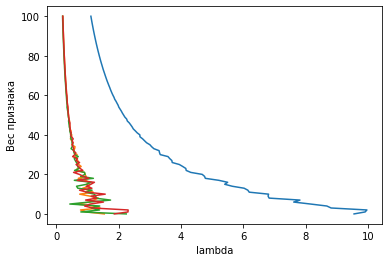

In [9]:
W_array = np.array(W_array)

for i in range(W_array.shape[1]):
    plt.plot(W_array[:, i], regs)
plt.xlabel('lambda')
plt.ylabel('Вес признака');

*Вывод: при увеличении <tex>$\lambda$</tex> веса становятся менее значимые и стремятся к нулю*

#### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [10]:
# функция производной модуля для L1-регуляризации

def module_der(x):
    return x / abs(x)

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg * module_der(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

#### 3*. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Теоретически применить можно, но это не будеть иметь смысла, т.к. принимаются значения последнего масштабирования и, на практике, некоторые модели не смогут с нормализацией/стандартизацией.

#### 4*. Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [12]:
from sklearn.datasets import make_regression

In [13]:
# функция, определяющая среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [14]:
# сгенерируем датасет

n_features = 2
n_objects = 100000

X, Y, coef = make_regression(n_samples=n_objects, n_features=n_features, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=42)

#### Классический градиентный спуск

In [15]:
# шаг градиентного спуска
eta = 0.05

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# зададим начальную разницу весов бесконечно большим числом
weight_dist = np.inf

# возьмем нулевые начальные веса
w = np.zeros(n_features)

def gd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))

        iter_num += 1
        w = new_w

    iters_gd = iter_num
    errors_gd = errors
    w_list_gd = np.array(w_list)

    return (iters_gd, errors_gd, w_list_gd)

In [16]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# счетчик итераций
iter_num = 0

iters_gd, errors_gd, w_list_gd = gd(w, w_list, errors, weight_dist, iter_num, max_iter)

#### Стохастический градиентный спуск

In [17]:
def sgd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0], size=1)

        y_pred = np.dot(X[train_ind], w)
        new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        error = mserror(X, new_w, Y)

        w_list.append(new_w.copy())
        errors.append(error)

        iter_num += 1
        w = new_w

    iters_sgd = iter_num
    errors_sgd = errors
    w_list_sgd = np.array(w_list)
    
    return (iters_sgd, errors_sgd, w_list_sgd)

In [18]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# счетчик итераций
iter_num = 0

iters_sgd, errors_sgd, w_list_sgd = sgd(w, w_list, errors, weight_dist, iter_num, max_iter)

In [19]:
iters_gd, iters_sgd

(154, 1000)

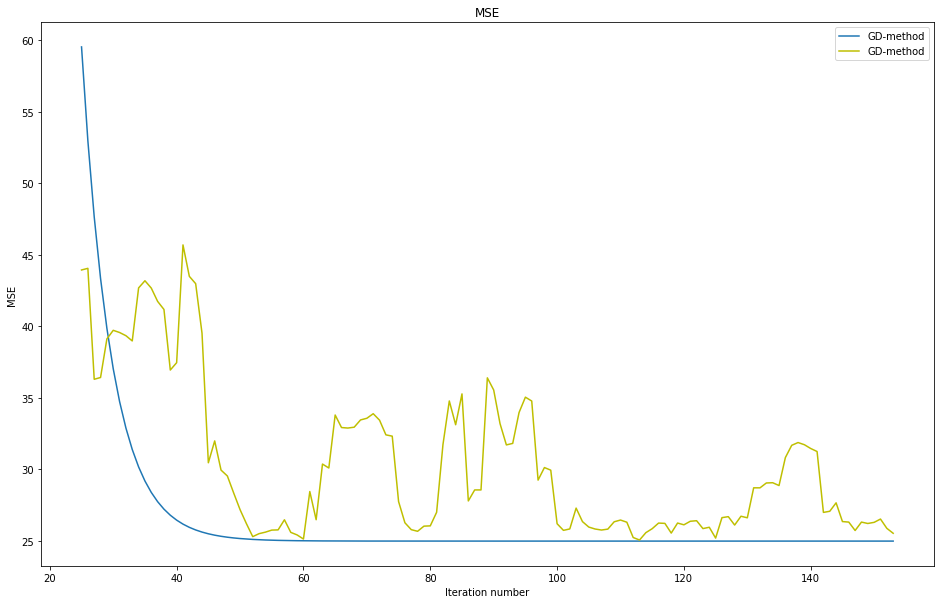

In [20]:
plt.figure(figsize=(16, 10))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

x = range(iters_gd)
delta = 25
plt.plot(x[delta:], errors_gd[delta:], label='GD-method')
plt.plot(x[delta:], errors_sgd[delta:iters_gd], label='GD-method', c='y')
plt.legend()

plt.show()

In [21]:
start_time = time.time()
gd(w, w_list, errors, weight_dist, iter_num, max_iter)
print("Градиентный спуск выполняется за %s секунды" % (time.time() - start_time))

Градиентный спуск выполняется за 3.4082539081573486 секунды


In [22]:
start_time = time.time()
sgd(w, w_list, errors, weight_dist, iter_num, max_iter)
print("Стохастический градиентный спуск выполняется за %s секунды" % (time.time() - start_time))

Стохастический градиентный спуск выполняется за 21.555012464523315 секунды


*Вывод: по графику, как и по значениям на выходе видно, что стохастическому спуску на этих данных понадобилось больше времени и большее количество итераций для достижения лучшего результата.*